# Creating Data

In [1]:
import numpy as np
import pandas as pd
from datageneration import PowerLawChirpPowerLawSeperation, DataLoader

## Define the ranges over which the population distribution exists

limits = {'chirp_mass':          [0.5, 1.4],  # In solar masses
          'seperation':          [0.5, 20],   # In 1e8 meters
          'luminosity_distance': [1, 50],     # In kilo parsecs
          'phase':               [0, 2*np.pi]}

## Instantiate the population distribution object

dist = PowerLawChirpPowerLawSeperation(limits=limits, 
                                       distance_power_law_index=1)   # p(d) ~ d

Lambda = {'alpha' : -1.01, 'beta' : -2.01}

ts, strain = dist.generate_time_series(Lambda, 
                                       N_white_dwarfs=1000, 
                                       sample_rate=0.25, 
                                       duration=10000)


dist.save_to_file("./injected_population.hdf5", extra_parameters={'population_parameters' : pd.Series(Lambda)})

Data saved to ./injected_population.hdf5


# Loading in Data

In [2]:
from datageneration import DataLoader

data = DataLoader("/Users/asadh/Documents/GitHub/gb-population-inference/datageneration/injected_population.hdf5")

In [3]:
data.strain, data.time, data.sample_rate, data.duration; # Extract things from the data object

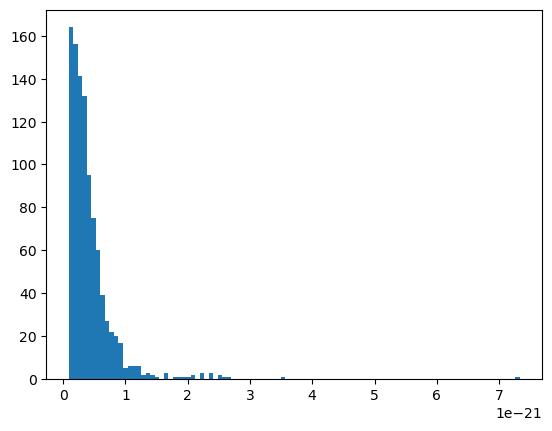

In [10]:
import matplotlib.pyplot as plt
plt.hist(data.loaded_dict['injected_population']['amplitude'], bins=100)
plt.show()

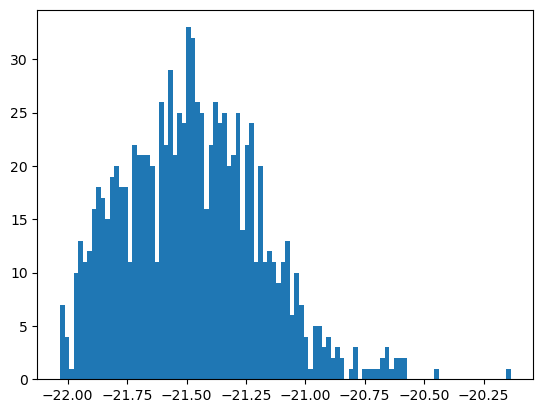

In [12]:
import matplotlib.pyplot as plt
plt.hist(np.log(data.loaded_dict['injected_population']['amplitude']) / np.log(10), bins=100)
plt.show()

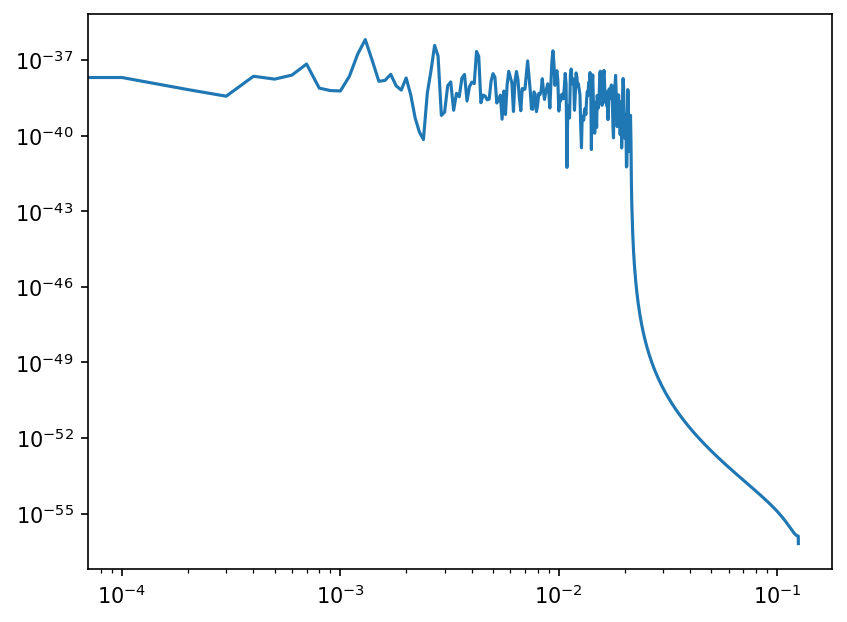

In [10]:
data.plot_psd()

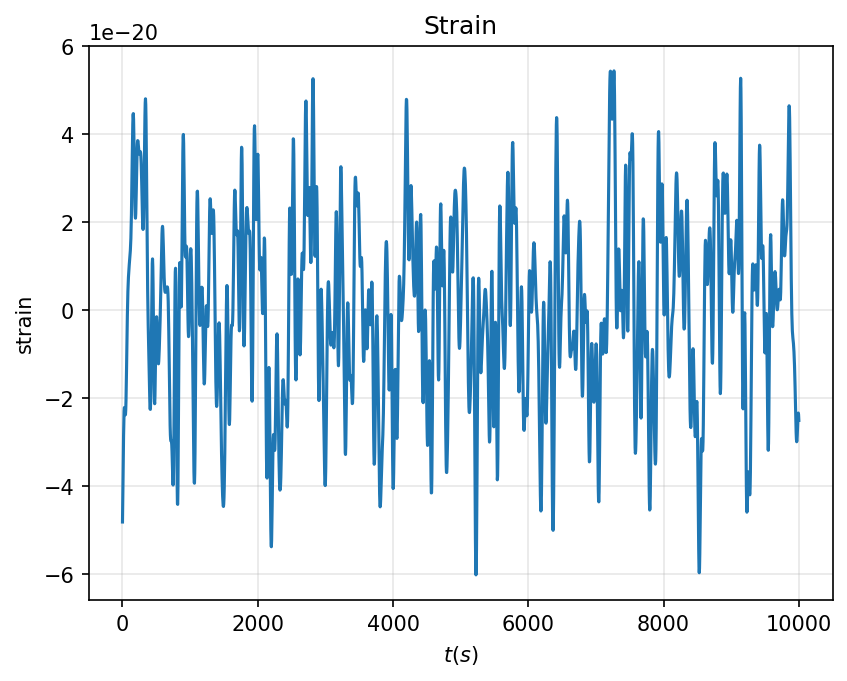

In [11]:
data.plot_strain()